In [115]:
import glob

from PIL import Image
import PIL.ExifTags

import numpy as np
import pandas as pd
from scipy.stats import skew

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as md
plt.rcParams['figure.figsize'] = [14, 8]
import seaborn as sns
sns.set_palette("deep")
sns.set_context("notebook")

In [107]:
all_lights = sorted(glob.glob("/Users/harry/stacking_newandromeda/lights/*.CR2"))

In [108]:
def get_raw_info(img_filename):

    img_index = img_filename.split("_")[-1].split(".")[0]
    
    img = Image.open(img_filename, mode='r')
    img_array = np.asarray(img)

    r_np = img_array[:,:,0].flatten()
    g_np = img_array[:,:,1].flatten()
    b_np = img_array[:,:,2].flatten()

    img_dict = {}
    img_dict['index'] = img_index
    
    img_dict['r_mean'] = r_np.mean()
    img_dict['g_mean'] = g_np.mean()
    img_dict['b_mean'] = b_np.mean()
    img_dict['r_std'] = r_np.std()
    img_dict['g_std'] = g_np.std()
    img_dict['b_std'] = b_np.std()    
    img_dict['r_skew'] = skew(r_np)
    img_dict['g_skew'] = skew(g_np)
    img_dict['b_skew'] = skew(b_np)    
    
    exif = {
        PIL.ExifTags.TAGS[k]: v
        for k, v in img.getexif().items()
        if k in PIL.ExifTags.TAGS
    }
    img_dict["DateTime"] = exif["DateTime"]
        
    return img_dict

In [109]:
data_list = []

for i, img in enumerate(all_lights):
    percent_step = 100*(float(i)/len(all_lights))

    print("Parsing Img: {}, % Completion = {}".format(img, percent_step))
    img_dict = get_raw_info(img)
    data_list.append(img_dict)
    
df = pd.DataFrame(data_list)
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%Y:%m:%d %H:%M:%S')

Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0706.CR2, % Completion = 0.0
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0707.CR2, % Completion = 0.2724795640326975
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0708.CR2, % Completion = 0.544959128065395
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0709.CR2, % Completion = 0.8174386920980926
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0710.CR2, % Completion = 1.08991825613079
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0711.CR2, % Completion = 1.3623978201634876
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0712.CR2, % Completion = 1.6348773841961852
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0713.CR2, % Completion = 1.9073569482288828
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0714.CR2, % Completion = 2.17983651226158
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0715.CR2, % Completion = 2.4523160

Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0787.CR2, % Completion = 22.070844686648503
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0788.CR2, % Completion = 22.3433242506812
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0789.CR2, % Completion = 22.615803814713896
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0790.CR2, % Completion = 22.888283378746593
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0791.CR2, % Completion = 23.160762942779293
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0792.CR2, % Completion = 23.43324250681199
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0793.CR2, % Completion = 23.705722070844686
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0794.CR2, % Completion = 23.978201634877383
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0795.CR2, % Completion = 24.250681198910083
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0796.CR2, % Compl

Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0868.CR2, % Completion = 44.141689373297005
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0869.CR2, % Completion = 44.4141689373297
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0870.CR2, % Completion = 44.6866485013624
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0871.CR2, % Completion = 44.95912806539509
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0872.CR2, % Completion = 45.23160762942779
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0873.CR2, % Completion = 45.50408719346049
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0874.CR2, % Completion = 45.776566757493185
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0875.CR2, % Completion = 46.049046321525886
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0876.CR2, % Completion = 46.321525885558586
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0877.CR2, % Completio

Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0949.CR2, % Completion = 66.21253405994551
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0950.CR2, % Completion = 66.4850136239782
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0951.CR2, % Completion = 66.7574931880109
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0952.CR2, % Completion = 67.0299727520436
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0953.CR2, % Completion = 67.30245231607628
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0954.CR2, % Completion = 67.57493188010899
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0955.CR2, % Completion = 67.8474114441417
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0956.CR2, % Completion = 68.11989100817438
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0957.CR2, % Completion = 68.39237057220708
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_0958.CR2, % Completion = 68

Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1030.CR2, % Completion = 88.28337874659401
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1031.CR2, % Completion = 88.5558583106267
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1032.CR2, % Completion = 88.8283378746594
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1033.CR2, % Completion = 89.10081743869209
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1034.CR2, % Completion = 89.3732970027248
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1035.CR2, % Completion = 89.64577656675749
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1036.CR2, % Completion = 89.91825613079018
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1037.CR2, % Completion = 90.19073569482289
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1038.CR2, % Completion = 90.46321525885558
Parsing Img: /Users/harry/stacking_newandromeda/lights/_MG_1039.CR2, % Completion = 9

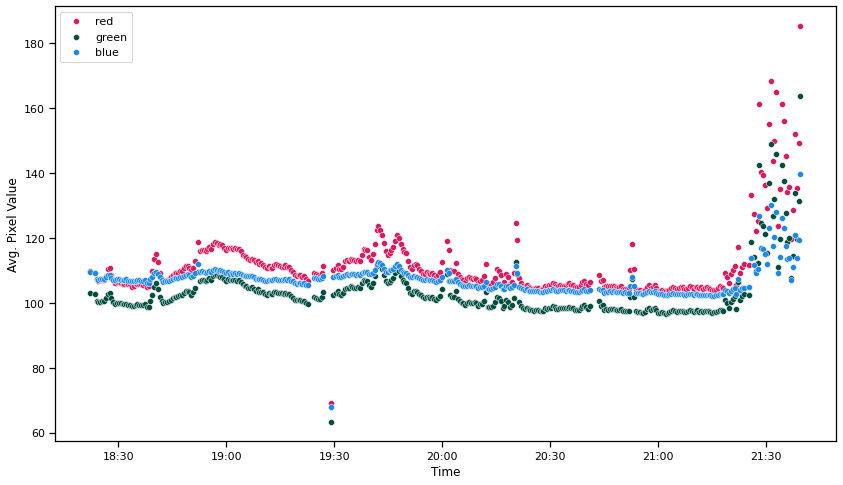

In [118]:
ax = sns.scatterplot(data=df, x="DateTime", y='r_mean', color='#D81B60', label='red')
ax = sns.scatterplot(data=df, x="DateTime", y='g_mean', color='#004D40', label='green')
ax = sns.scatterplot(data=df, x="DateTime", y='b_mean', color='#1E88E5', label='blue')
ax.set(xlabel='Time', ylabel='Avg. Pixel Value')
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.show()

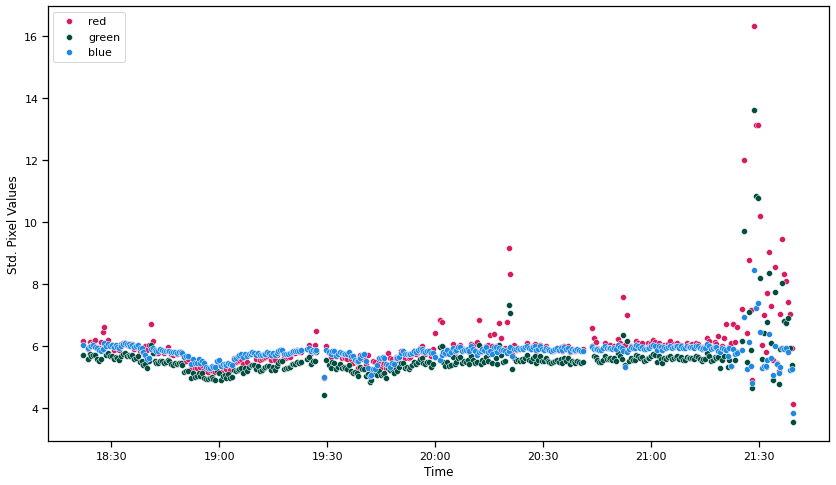

In [119]:
ax = sns.scatterplot(data=df, x="DateTime", y='r_std', color='#D81B60', label='red')
ax = sns.scatterplot(data=df, x="DateTime", y='g_std', color='#004D40', label='green')
ax = sns.scatterplot(data=df, x="DateTime", y='b_std', color='#1E88E5', label='blue')
ax.set(xlabel='Time', ylabel='Std. Pixel Values')
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.show()

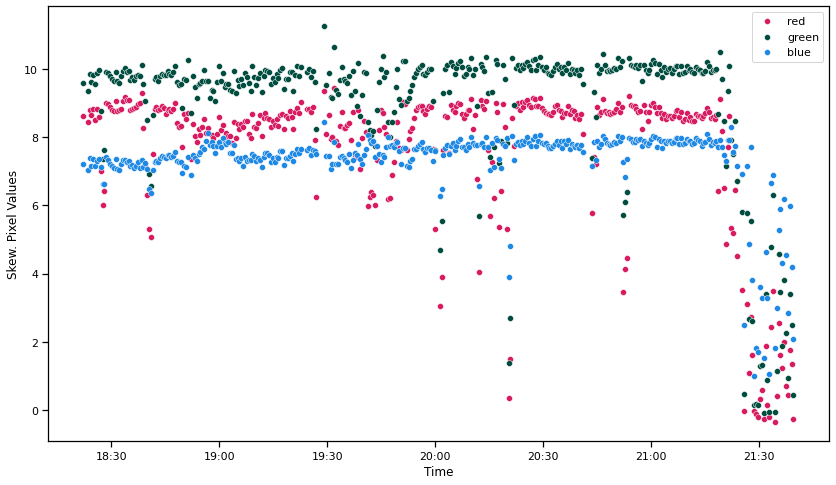

In [117]:
ax = sns.scatterplot(data=df, x="DateTime", y='r_skew', color='#D81B60', label='red')
ax = sns.scatterplot(data=df, x="DateTime", y='g_skew', color='#004D40', label='green')
ax = sns.scatterplot(data=df, x="DateTime", y='b_skew', color='#1E88E5', label='blue')
ax.set(xlabel='Time', ylabel='Skew. Pixel Values')
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.show()

In [22]:
I[:,:,0].flatten()

array([105, 105, 106, ..., 105, 105, 105], dtype=uint8)

In [23]:
I[:,:,1].flatten()

array([95, 95, 96, ..., 96, 96, 96], dtype=uint8)

In [60]:
all_lights[0]

'/Users/harry/stacking_newandromeda/lights/_MG_0843.CR2'

In [57]:
img = Image.open(all_lights[0])
[f for f in dir(img) if "exif" in f]
import PIL.ExifTags
exif = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img.getexif().items()
    if k in PIL.ExifTags.TAGS
}
img.getexif()

In [59]:
exif

{'ImageWidth': 5184,
 'ImageLength': 3456,
 'BitsPerSample': (8, 8, 8),
 'Compression': 6,
 'GPSInfo': 69788,
 'ResolutionUnit': 2,
 'ExifOffset': 446,
 'Make': 'Canon',
 'Model': 'Canon EOS 700D',
 'StripOffsets': 84372,
 'Orientation': 1,
 'DateTime': '2021:12:29 19:37:07',
 'Artist': '',
 'StripByteCounts': 1740190,
 'Copyright': '',
 'XResolution': 72.0,
 'YResolution': 72.0,
 'XMLPacket': b'<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?><x:xmpmeta xmlns:x="adobe:ns:meta/"><rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"><rdf:Description rdf:about="" xmlns:xmp="http://ns.adobe.com/xap/1.0/"><xmp:Rating>0</xmp:Rating></rdf:Description></rdf:RDF></x:xmpmeta>                                                                                                                                \n                                                                                                                                \n                                     